In [5]:
# -*- coding: utf-8 -*-
import pandas as pd
import pathlib
import numpy as np
# from scipy.io import 
import os
from src.ML import utils, data_gen
# from matplotlib import pyplot as plt
from private_modules import load_yaml_config
from private_modules.Torch import MCFDS
import torch.utils.data as Data

In [6]:
Database_dir = './Database'
Database_dir = pathlib.Path(Database_dir)
mat_dir = os.path.expandvars("$DATABASE_PATH/DataBase/WEST/PCS")
mat_dir = pathlib.Path(mat_dir)

config_file = './Database/configs/data_config.yml'
config = load_yaml_config(config_file)

data_params = config['data']
node_maps = config['nodes']
input_nodes, output_nodes = [], []

input_list = data_params['input_list']
output_list = data_params['output_list']

for nodeList_name in input_list:
    if "_real" in nodeList_name:
        dummy_list = node_maps[nodeList_name[:-5]]
        dummy_list = [f"{node}_3" for node in dummy_list]
        input_nodes.extend(dummy_list)
    elif "_ref" in nodeList_name:
        dummy_list = node_maps[nodeList_name[:-4]]
        dummy_list = [f"{node}_0" for node in dummy_list]
        input_nodes.extend(dummy_list)

for nodeList_name in output_list:
    if "_real" in nodeList_name:
        dummy_list = node_maps[nodeList_name[:-5]]
        dummy_list = [f"{node}_3" for node in dummy_list]
        output_nodes.extend(dummy_list)
    elif "_ref" in nodeList_name:
        dummy_list = node_maps[nodeList_name[:-4]]
        dummy_list = [f"{node}_0" for node in dummy_list]
        output_nodes.extend(dummy_list)

FileNotFoundError: [Errno 2] No such file or directory: './Database/configs/data_config.yml'

In [9]:
mat_file = "/zhisongqu_data/chgwan/DataBase/WEST/PCS/DCS_archive_57656.mat"
MS_file = "/home/chenguang.wan/Papers/DataTest/Database/Stat/node_MS.csv"
MS_df = pd.read_csv(MS_file, index_col=0)

In [22]:
input_nodes

['PowLH1_scope_3',
 'PowLH2_scope_3',
 'PhaLH1_scope_3',
 'PhaLH2_scope_3',
 'PowIC1_scope_3',
 'PowIC2_scope_3',
 'PowIC3_scope_3',
 'PhaIC1_scope_3',
 'PhaIC2_scope_3',
 'PhaIC3_scope_3',
 'IA_scope_3',
 'Ip_scope_0',
 'REF1_scope_0']

In [10]:
mat_files = []
mat_files.append(mat_file)

ds = data_gen.StdWESTShotDS(
    mat_files, 
    input_nodes=input_nodes, 
    output_nodes=output_nodes,
    MS_df = MS_df
    )


In [11]:
for data in iter(ds):
    X, Y, Y_len, Y_flags, info = data

In [15]:
X.shape

(9811, 13)

In [24]:
ids = np.any(np.isnan(X), axis=0)
ids

array([False, False, False, False, False, False, False,  True,  True,
        True, False, False, False])

In [21]:
np.array(input_nodes)[ids]

array(['PhaIC1_scope_3', 'PhaIC2_scope_3', 'PhaIC3_scope_3'], dtype='<U14')

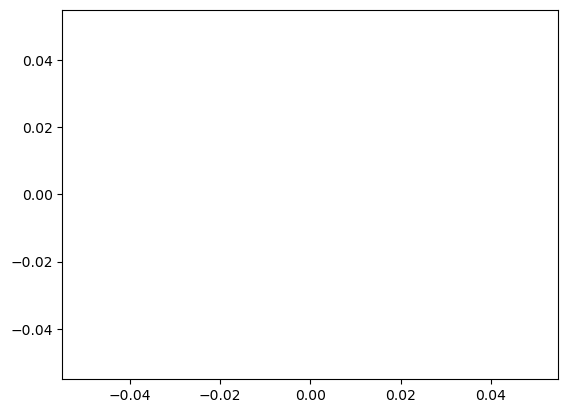

In [26]:
# plt.plot(X[:, -4])
data = X[:, -4]

In [31]:
MS_df.loc[:, 'PhaIC3_scope_3']

mean     138.456801
stDev           NaN
Name: PhaIC3_scope_3, dtype: float64

In [33]:
MS_df.loc["stDev", :]

IA_scope_0             0.333254
IA_scope_3          5281.403334
IBb_scope_0          177.022079
IBb_scope_3          261.075895
IDb_scope_0          381.076615
IDb_scope_3          380.643977
IEb_scope_0          458.263480
IEb_scope_3          460.030104
IFb_scope_0          323.809759
IFb_scope_3          374.437298
IFh_scope_0          286.477375
IFh_scope_3          326.097710
IEh_scope_0          418.142386
IEh_scope_3          435.637889
IDh_scope_0          388.680107
IDh_scope_3          440.437177
IBh_scope_0          408.840774
IBh_scope_3          412.723394
IXb_scope_0         4862.903589
IXb_scope_3         4804.549929
IXh_scope_0         2627.257249
IXh_scope_3         2682.020334
Ip_scope_0        219392.911247
Ip_scope_3        219406.105768
Vloop_scope_0          0.002080
Vloop_scope_3          5.749986
R_scope_0              1.212239
R_scope_3              0.757914
Z_scope_0              0.005812
Z_scope_3              0.749431
dXlow_scope_0          0.028698
dXlow_sc

In [27]:
np.nan_to_num(X[:, -4])

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
mat_dir = os.path.expandvars("$DATABASE_PATH/DataBase/WEST/PCS")
mat_dir = pathlib.Path(mat_dir)

mat_file = mat_dir.joinpath("DCS_archive_58308.mat")
nodes = ["Ip_scope_0", "Ip_scope_3", "Vloop_scope_3", "Vloop_scope_0"]
data_dict = utils.read_mat_file(mat_file, nodes)
Ip_ref = data_dict['Ip_scope_0']
Ip_real = data_dict['Ip_scope_3']
x_axis = np.arange(len(Ip_ref))
slopes = Ip_ref[1:] - Ip_ref[:-1]
slopes = np.abs(slopes)

In [41]:
start_idx, end_idx  = utils.get_ref_interval(mat_file)

In [42]:
vloop = data_dict['Vloop_scope_3']

In [43]:
vloop_ref = data_dict['Vloop_scope_0']

In [46]:
start_idx, end_idx

(29475, 90010)

In [47]:
vloop.shape

(90010,)

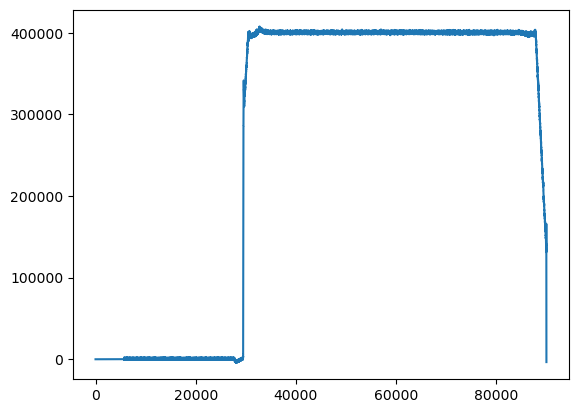

In [49]:
plt.plot(Ip_real)

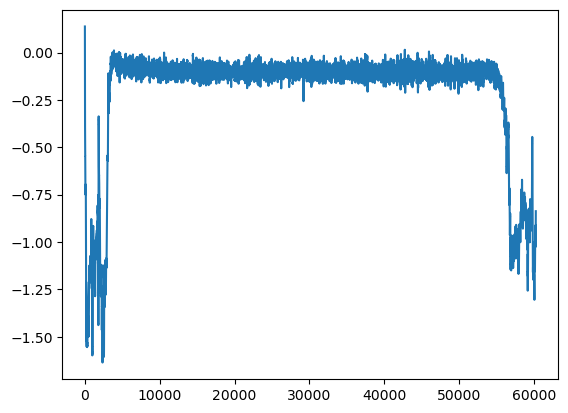

In [51]:
# plt.plot(vloop[start_idx+100:-100])
plt.plot(vloop[start_idx+200:end_idx-100])
# plt.plot(Ip_ref[start_idx+100:-100])

In [90]:
eps = 1e-5
ids = Ip_ref > (1.0 + eps)
np.min(x_axis[ids])

29629

In [89]:
Ip_ref[29628]

1.0

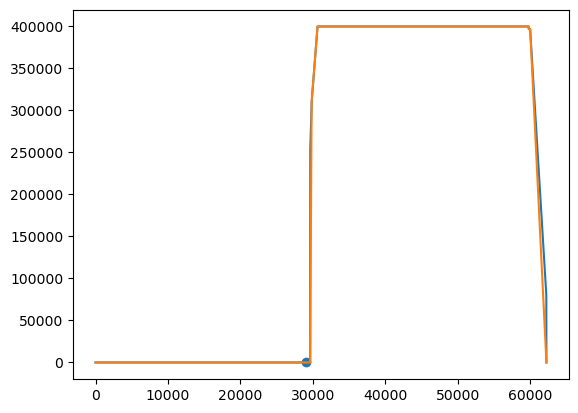

In [72]:
ids = slopes == 0 
plt.plot(x_axis[1:] ,Ip_ref[1:])

np.count_nonzero(ids)
plt.plot(x_axis[1:][ids],Ip_ref[1:][ids])

slice = 30000 - 1000
plt.scatter(x_axis[slice], Ip_ref[slice])

In [69]:
np.count_nonzero(slopes == 0)

59001

In [70]:
def find_continue(arr):
    for i in range(len(arr)):
        

(62239,)

In [80]:
ids = Ip_ref > 1.0 
np.min(np.arange(len(ids))[ids])

29629

In [82]:
Ip_ref[29628]

1.0

In [51]:
np.unique(np.abs(Ip_ref[1:] - Ip_ref[:-1])

array([0.00000000e+00, 1.00000000e+00, 7.06205623e+00, 1.06889400e+02,
       1.12492800e+02, 1.12521600e+02, 1.18125000e+02, 1.41776507e+02,
       1.41776507e+02, 1.41776507e+02, 1.41776507e+02, 1.41776507e+02,
       1.41776507e+02, 1.41776507e+02, 1.41776507e+02, 1.41776507e+02,
       1.41776507e+02, 1.41776507e+02, 1.41776507e+02, 1.41776507e+02,
       1.41776507e+02, 1.41776507e+02, 1.41776507e+02, 1.41776507e+02,
       1.41812804e+02, 1.41812804e+02, 1.41812804e+02, 1.41812804e+02,
       1.41812804e+02, 1.41812804e+02, 1.41812804e+02, 1.41812804e+02,
       1.41812804e+02, 1.41812804e+02, 1.41812804e+02, 1.41812804e+02,
       1.41812804e+02, 2.84961600e+02, 2.99980800e+02, 2.99980800e+02,
       2.99980800e+02, 3.00057600e+02, 3.15000000e+02, 3.00037265e+03,
       8.03843353e+04, 2.49999000e+05])

In [ ]:
1 < np.abs(Ip_ref[1:] - Ip_ref[:-1]) & 

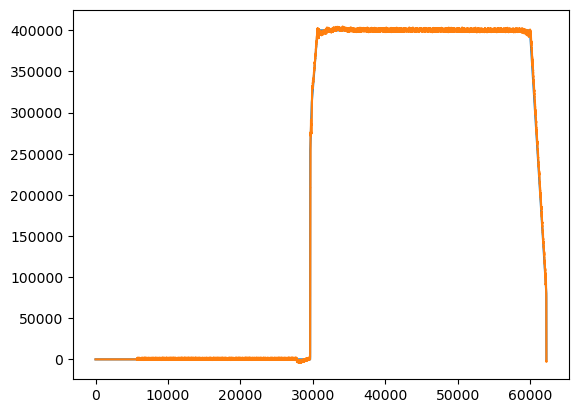

In [8]:
Ip_ref = Ip_ref_dict['Ip_scope_0']
Ip_act = Ip_ref_dict['Ip_scope_3']
plt.close('all')
plt.plot(Ip_ref)
plt.plot(Ip_act)

In [15]:
ids = Ip_ref <= 1
np.count_nonzero(ids)

29644

In [27]:
np.count_nonzero(Ip_ref[40000:] == 1) 

15

In [16]:
Ip_ref.shape

(62240,)

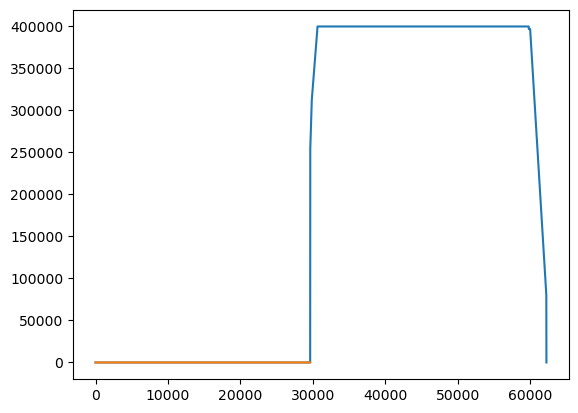

In [18]:
plt.close('all')
plt.plot(Ip_ref)
plt.plot(Ip_ref[ids])

In [102]:
df = pd.read_csv("/home/chenguang.wan/Papers/DataTest/Database/Stat/node_stat.csv", index_col=0)
ids = df.index[df.loc[:, "length"] < 1000]
# df.loc[ids, :]
ids.to_list()

[58687,
 58436,
 58628,
 58593,
 58434,
 58490,
 58637,
 58661,
 58525,
 58473,
 58586,
 58619,
 58544,
 58662,
 58452,
 58666,
 57440,
 58273,
 57419,
 57422,
 57421,
 58591,
 57783,
 58521,
 58491,
 58642,
 58587,
 58640,
 58676,
 58451,
 58620,
 58547,
 58444,
 58517,
 58476,
 58454,
 58445,
 58677,
 58629,
 58579,
 58670,
 58523,
 58571,
 58463,
 58681,
 58550,
 58645,
 58466,
 58678,
 58493,
 58478,
 58507,
 58533,
 58607,
 58495,
 58552,
 58622,
 58457,
 58479,
 58421,
 58623,
 58603,
 58540,
 58497,
 58465,
 58597,
 58582,
 58486,
 58606,
 58472,
 58460,
 58536,
 58567,
 58529,
 58505,
 58501,
 58562,
 58595,
 58519,
 58566,
 58456,
 58469,
 58683,
 58594,
 58492,
 58565,
 58477,
 58598,
 58563,
 58551,
 58487,
 58520,
 58518,
 58684,
 59442]

In [11]:
keys = list(df.columns)
sub_keys = [key for key in keys if "length" in key ]

In [14]:
df.loc[:, sub_keys]

NameError: name 'np' is not defined

In [100]:
df.shape

(677, 301)

In [103]:
node_MS_file = "/home/chenguang.wan/Papers/DataTest/Database/Stat/node_MS.csv"

In [108]:
df = pd.read_csv(node_MS_file, index_col=0)
df.loc[:, 'PowIC2_scope_3']

mean      10877.602464
stDev    116242.514348
Name: PowIC2_scope_3, dtype: float64

In [35]:
a = [1, 2, 3, 4]

In [36]:
b = np.array([True, False, True, False])

In [38]:
np.array(a)

array([1, 2, 3, 4])

In [3]:
mat_file = "/zhisongqu_data/chgwan/DataBase/WEST/PCS/DCS_archive_57656.mat"
ms_file = "/home/chenguang.wan/Papers/DataTest/Database/Stat/node_MS.csv"
stat_file = "/home/chenguang.wan/Papers/DataTest/Database/Stat/node_stat.csv"

In [7]:
ms_df = pd.read_csv(ms_file, index_col=0)
stat_df = pd.read_csv(stat_file, index_col=0)

In [53]:
shot = 57604
mat_file = f'$DATABASE_PATH/DataBase/WEST/PCS/DCS_archive_{shot}.mat'
mat_file = os.path.expandvars(mat_file)

In [54]:
loadmat(mat_file)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  9 14:10:56 2024',
 '__version__': '1.0',
 '__globals__': [],
 'Cu_impurity_level_event': array([[14]], dtype=uint8),
 'EROG_bit_position': array([[13]], dtype=uint8),
 'Fe_impurity_level_event': array([[13]], dtype=uint8),
 'IA_bit_position': array([[0]], dtype=uint8),
 'IBb_bit_position': array([[8]], dtype=uint8),
 'IBh_bit_position': array([[1]], dtype=uint8),
 'IDb_bit_position': array([[7]], dtype=uint8),
 'IDh_bit_position': array([[2]], dtype=uint8),
 'IEb_bit_position': array([[6]], dtype=uint8),
 'IEh_bit_position': array([[3]], dtype=uint8),
 'IFb_bit_position': array([[5]], dtype=uint8),
 'IFh_bit_position': array([[4]], dtype=uint8),
 'IXb_bit_position': array([[10]], dtype=uint8),
 'IXh_bit_position': array([[9]], dtype=uint8),
 'Ip_bit_position': array([[15]], dtype=uint8),
 'LROG_bit_position': array([[30]], dtype=uint8),
 'R0_bit_position': array([[12]], dtype=uint8),
 'UROG_bit_position': arr

In [8]:
stat_df.loc[57656, "length"]

39620